In [4]:
import os
import numpy as np
import csv


In [20]:
#import numpy as np
import matplotlib.pyplot as plt


In [15]:
import os
import numpy as np
import csv

def calculate_cv_and_mean(depth_values):
    """
    Calculate the coefficient of variation (CV) and mean for a list of depth values.

    Parameters:
    - depth_values (list or numpy array): The depth values for which to compute CV and mean.

    Returns:
    - tuple: (CV, mean) where CV is the coefficient of variation and mean is the average depth.
    """
    mean_depth = np.mean(depth_values)
    std_depth = np.std(depth_values)
    if mean_depth == 0:
        return float('inf'), mean_depth  # Handle edge case where mean is zero
    return std_depth / mean_depth, mean_depth


def find_lowest_cv_window(input_file, window_size=150):
    """
    Reads depth values from a file, calculates CV and mean for each window,
    and finds the window with the lowest CV.

    Parameters:
    - input_file (str): Path to the input file containing depth data (tab-separated).
    - window_size (int): The size of the sliding window (default is 150).

    Returns:
    - result (tuple): A tuple containing start position, end position, lowest CV value, average depth of the window, and overall average depth.
    """
    positions = []
    depths = []

    # Read data from the input file
    with open(input_file, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) < 3:
                continue  # Skip lines that don't have enough columns
            position = int(parts[1])  # Use the second column as position
            depth = float(parts[2])   # Use the third column as depth value
            positions.append(position)
            depths.append(depth)

    depths = np.array(depths)
    overall_avg_depth = np.mean(depths)  # Calculate the overall average depth

    # Find the window with the lowest CV
    min_cv = float('inf')
    min_mean_depth = None
    min_window_start = None
    min_window_end = None

    for start_idx in range(len(depths) - window_size + 1):
        # Extract window depths
        window_depths = depths[start_idx:start_idx + window_size]
        # Calculate CV and mean for the window
        cv, mean_depth = calculate_cv_and_mean(window_depths)

        if cv < min_cv:
            min_cv = cv
            min_mean_depth = mean_depth
            min_window_start = positions[start_idx]
            min_window_end = positions[start_idx + window_size - 1]

    return min_window_start, min_window_end, min_cv, min_mean_depth, overall_avg_depth


def process_files_in_directory(directory_path, output_csv, chr_value, file_type, window_size=150):
    """
    Processes selected files in a directory based on chr_value and saves results to a CSV file.

    Parameters:
    - directory_path (str): Path to the directory containing input files.
    - output_csv (str): Path to the output CSV file.
    - chr_value (str): Keyword to filter files based on chr (e.g., "5.8S").
    - file_type (str): Type description to include in the output.
    - window_size (int): The size of the sliding window (default is 150).
    """
    results = []

    for file_name in os.listdir(directory_path):
        if chr_value in file_name:  # Filter files based on chr_value
            file_path = os.path.join(directory_path, file_name)
            if os.path.isfile(file_path):
                try:
                    start, end, min_cv, avg_window_depth, overall_avg_depth = find_lowest_cv_window(
                        file_path, window_size=window_size
                    )
                    partial_file_name = file_name.split("_")[0]  # Extract partial file name
                    results.append({
                        "file": partial_file_name,
                        "start": start,
                        "end": end,
                        "mean_cv": min_cv,
                        "avg_window_depth": avg_window_depth,
                        "overall_avg_depth": overall_avg_depth,
                        "window_size": window_size,
                        "chr": chr_value,
                        "type": file_type
                    })
                except Exception as e:
                    print(f"Error processing file {file_name}: {e}")

    # Save results to CSV
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ["file", "start", "end", "mean_cv", "avg_window_depth", "overall_avg_depth", "window_size", "chr", "type"]
        csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        csv_writer.writeheader()
        csv_writer.writerows(results)

    print(f"Results saved to {output_csv}")




In [17]:
input_directory = "5s_depth_blood"  # Replace with your directory path
output_csv = "test_results2.csv"  # Replace with your desired output CSV file name
chr_value = "5S" # Replace with the chr to filter files
file_type = "blood"# Replace with the desired type description
window_size = 300

process_files_in_directory(input_directory, output_csv, chr_value, file_type, window_size)

Results saved to test_results2.csv


In [ ]:
# average

In [ ]:
def calculate_average_third_column(input_folder, output_file):
    """
    A command to calculate the third column of the same row of all txt files in a folder and output it to a file while retaining the original format.
    
    parameter:
        input_folder (str): Input folder path, including all txt files.
        output_file (str): Output result file path.
    """
    # Get all file paths
    file_list = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith('.txt')]

    # Check if files exist
    if not file_list:
        raise ValueError("txt file not found in the specified folder")

    # Initialize a list to store cumulative values for each row
    total_values = []
    line_count = 0

    # Iterate over files and process
    for file_path in file_list:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            if line_count == 0:
                line_count = len(lines)
                total_values = [0.0] * line_count  # Initialize cumulative list

            for i, line in enumerate(lines):
                third_col_value = float(line.strip().split('\t')[2])
                total_values[i] += third_col_value

    # Calculate average
    file_count = len(file_list)
    average_values = [value / file_count for value in total_values]

    # Save results to a new file
    with open(output_file, 'w') as output:
        with open(file_list[0], 'r') as file:  # Use the format of the first file
            lines = file.readlines()
            for j, line in enumerate(lines):
                parts = line.strip().split('\t')
                parts[2] = f"{average_values[j]:.1f}"  # Update the third column with the average, 1 decimal place
                output.write('\t'.join(parts) + '\n')

    print(f"complete calculation, results saved to {output_file}")


In [ ]:
#5s blood
input_folder = '5s_depth_blood'  
output_file = 'lowest_window/5s_depth_blood_combined.txt'  

calculate_average_third_column(input_folder, output_file)

In [ ]:
#5s tumor
input_folder = '5s_depth_tumor'  
output_file = 'lowest_window/5s_depth_tumor_combined.txt'  

calculate_average_third_column(input_folder, output_file)

In [ ]:
#18s blood
input_folder = 'depth/18s_depth_blood'  
output_file = 'lowest_window/18s_depth_blood_combined.txt'  

calculate_average_third_column(input_folder, output_file)

In [ ]:
#18s tumor
input_folder = 'depth/18s_depth_tumor'  
output_file = 'lowest_window/18s_depth_tumor_combined.txt'  

calculate_average_third_column(input_folder, output_file)

In [ ]:
#28s blood
input_folder = 'depth/28s_depth_blood'  
output_file = 'lowest_window/28s_depth_blood_combined.txt'  

calculate_average_third_column(input_folder, output_file)

In [ ]:
#28s tumor
input_folder = 'depth/28s_depth_tumor'  
output_file = 'lowest_window/28s_depth_tumor_combined.txt'  

calculate_average_third_column(input_folder, output_file)

In [ ]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt

def find_and_plot_lowest_cv_window(input_file, window_size=150, title="Depth Plot with Lowest CV Window"):
    # Step 1: Read data
    def read_depth_file(file_path):
        positions, depths = [], []
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split('\t')
                positions.append(int(parts[1]))
                depths.append(float(parts[2]))
        return np.array(positions), np.array(depths)

    # Step 2: Calculate the interval with the lowest CV
    def find_min_cv_interval(positions, depths, window_size):
        min_cv = float('inf')
        min_interval = (0, 0)
        for i in range(len(depths) - window_size + 1):
            window = depths[i:i+window_size]
            cv = np.std(window) / np.mean(window)
            if cv < min_cv:
                min_cv = cv
                min_interval = (positions[i], positions[i + window_size - 1])
        return min_cv, min_interval

    # Step 3: Plot the depth chart and mark the interval with the lowest CV
    def plot_with_min_cv(positions, depths, min_interval, title):
        plt.figure(figsize=(12, 6))
        plt.plot(positions, depths, label="Depth", color="blue")
        plt.xlabel("Position")
        plt.ylabel("Depth")
        plt.title(title)

        # Mark the interval with the lowest CV
        start, end = min_interval
        plt.axvspan(start, end, color="red", alpha=0.3, label=f"Min CV Window ({start}-{end})")
        plt.legend()
        plt.show()

    
    positions, depths = read_depth_file(input_file)
    min_cv, min_interval = find_min_cv_interval(positions, depths, window_size)

    print(f"Minimum CV: {min_cv}")
    print(f"Minimum CV Window: {min_interval}")

    plot_with_min_cv(positions, depths, min_interval, title)


Minimum CV: 0.0070917960749991345
Minimum CV Window: (1015, 1164)


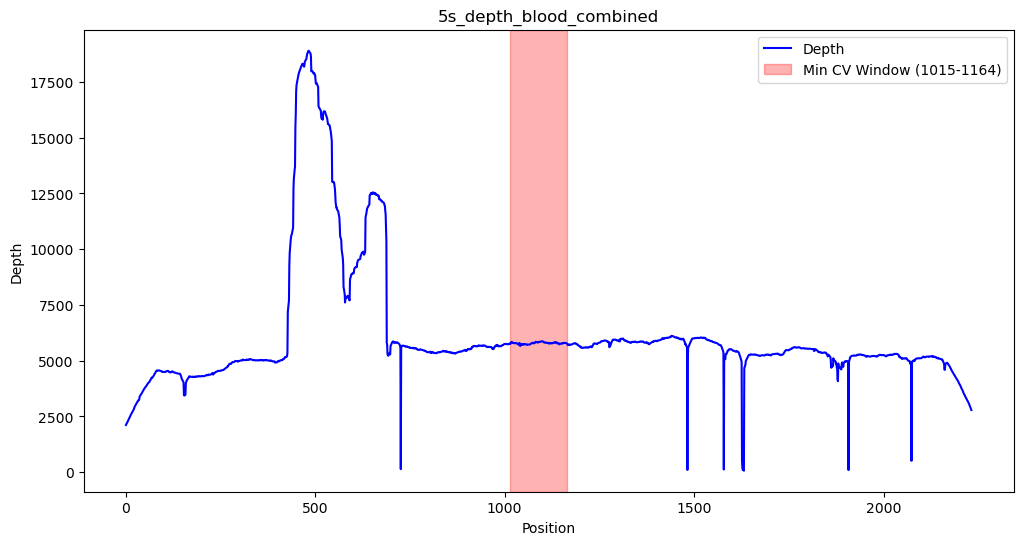

In [ ]:
#5s blood
find_and_plot_lowest_cv_window(
    input_file='lowest_window/5s_depth_blood_combined.txt',
    title="5s_depth_blood_combined"
)

Minimum CV: 0.008357815888345915
Minimum CV Window: (1016, 1165)


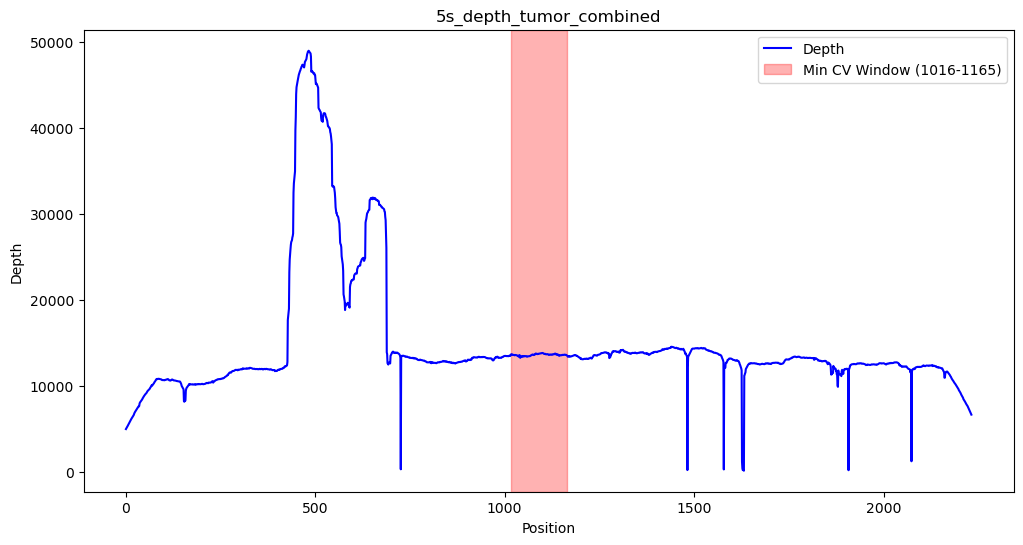

In [35]:
#5s tumor
find_and_plot_lowest_cv_window(
    input_file='lowest_window/5s_depth_tumor_combined.txt',
    title="5s_depth_tumor_combined"
)

Minimum CV: 0.0045384625383682355
Minimum CV Window: (3806, 3955)


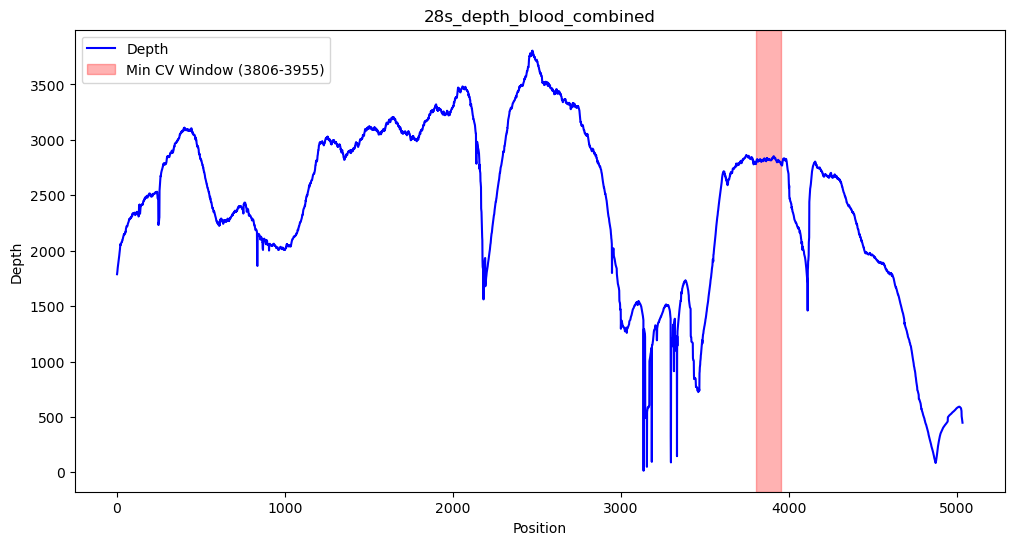

In [43]:
#28s blood
find_and_plot_lowest_cv_window(
    input_file='lowest_window/28s_depth_blood_combined.txt',
    title="28s_depth_blood_combined"
)

Minimum CV: 0.004496810386548045
Minimum CV Window: (3795, 3944)


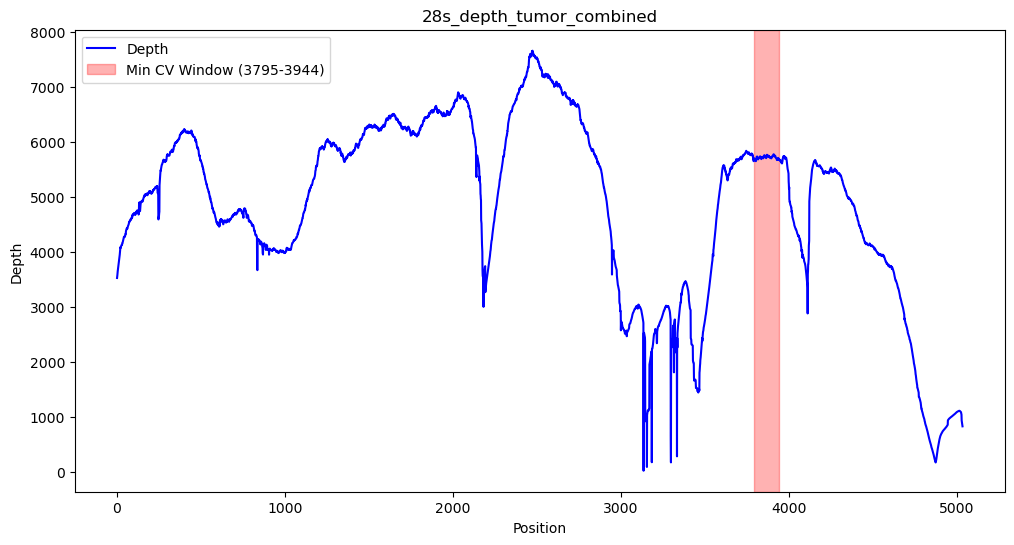

In [44]:
#28s tumor
find_and_plot_lowest_cv_window(
    input_file='lowest_window/28s_depth_tumor_combined.txt',
    title="28s_depth_tumor_combined"
)

Minimum CV: 0.009701295004446213
Minimum CV Window: (1034, 1183)


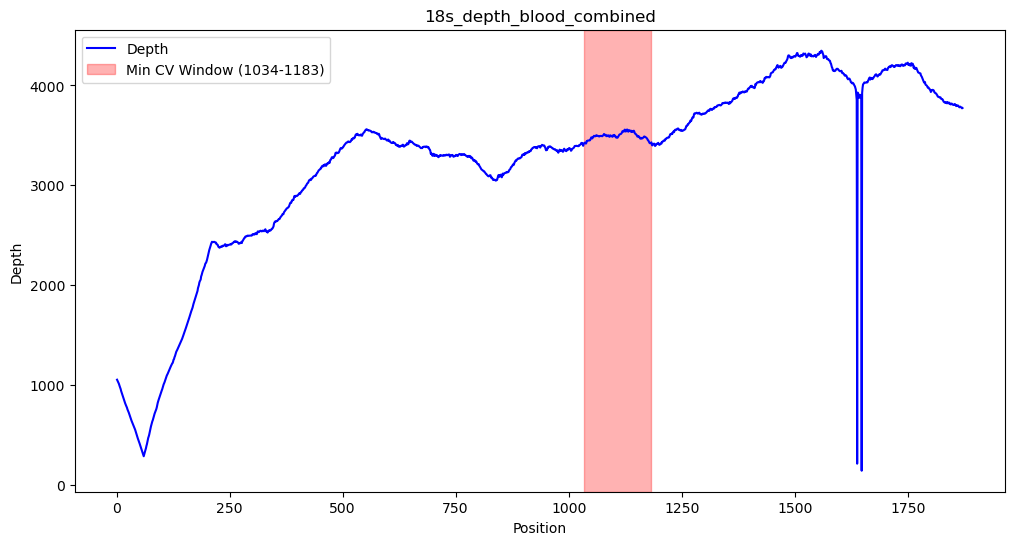

In [45]:
#18s blood
find_and_plot_lowest_cv_window(
    input_file='lowest_window/18s_depth_blood_combined.txt',
    title="18s_depth_blood_combined"
)

Minimum CV: 0.009358195799851764
Minimum CV Window: (897, 1046)


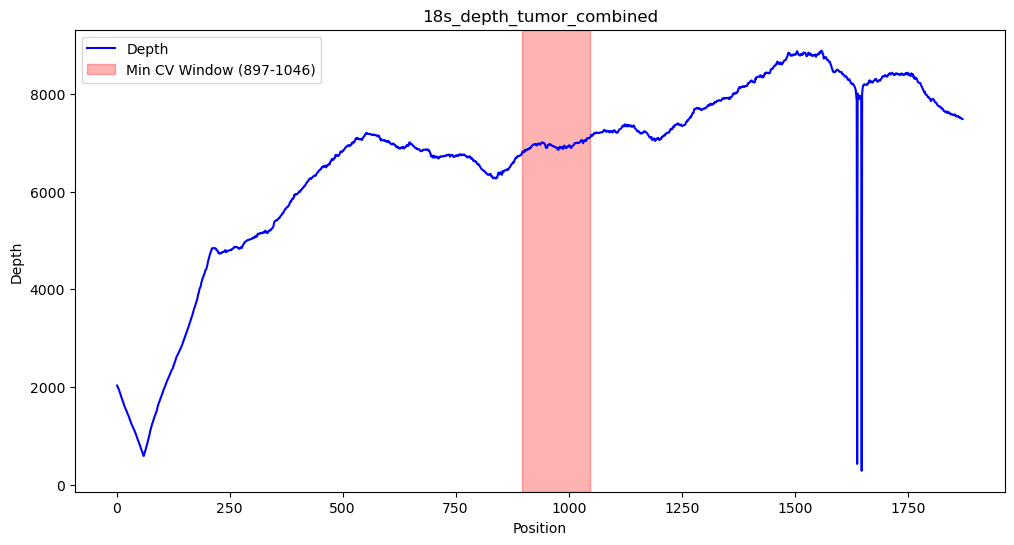

In [46]:
#18s tumor
find_and_plot_lowest_cv_window(
    input_file='lowest_window/18s_depth_tumor_combined.txt',
    title="18s_depth_tumor_combined"
)